In [68]:
import numpy as np
np.random.seed(1337)
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten ,Dropout
from keras.optimizers import Adam,SGD
from keras.models import Model
from sklearn.model_selection import train_test_split
import timeit
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import SGD
import random
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.losses import categorical_crossentropy

import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# -- Loading Data--

In [69]:
train_data = pd.read_csv("../input/ece657a-w20-asg3-part2/train.csv")
test_data = pd.read_csv("../input/ece657a-w20-asg3-part2/testX.csv")

x = train_data.iloc[:,2:].values
y = train_data.iloc[:,1].values

In [70]:
x.shape

(60000, 784)

# -- Reshaping Train data into 28*28--

In [71]:
x = x.reshape(len(train_data),28,28,1)

In [72]:
x.shape

(60000, 28, 28, 1)

In [73]:
y.shape

(60000,)

# -- Splitting the data--

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
x_train.shape

(48000, 28, 28, 1)

In [76]:
x_test.shape

(12000, 28, 28, 1)

In [77]:
y_train.shape

(48000,)

In [78]:
y_test.shape


(12000,)

In [79]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [80]:
img_size=48

# 1.--Resizing the data into 48*48--
# 2.--Normalizing the data--

In [81]:
from keras.preprocessing.image import img_to_array, array_to_img
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])


input_size = (img_size, img_size,1)

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (48000, 48, 48, 1)
x_test shape: (12000, 48, 48, 1)
48000 train samples
12000 test samples
y_train shape: (48000,)


In [82]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((48000, 48, 48, 1), (48000,), (12000, 48, 48, 1), (12000,))

In [83]:
# img_size = 28
num_classes = 5

# -- Categorical labels--

In [84]:
#Converting labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [85]:
y_train.shape

(48000, 5)

In [86]:
y_test.shape

(12000, 5)

# -----------MODEL 1----------- SGD() | BS: 64 | EPOCH: 50

In [87]:
model= Sequential()
model.add(Conv2D(96,(11,11), strides=1, activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(384, (3,3),padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256,  (3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Flatten())

model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer = keras.optimizers.SGD() , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 38, 38, 96)        11712     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 18, 18, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 256)        

# Fitting the model

In [88]:
import timeit 
start=timeit.default_timer()
a=model.fit(x_train,y_train,batch_size = 64,epochs = 50,verbose=1,validation_data=(x_test,y_test),shuffle=False)
stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 312us/step - loss: 1.3027 - accuracy: 0.4121 - val_loss: 0.8856 - val_accuracy: 0.6224
Epoch 2/50
48000/48000 [==============================] - 15s 307us/step - loss: 0.8372 - accuracy: 0.6467 - val_loss: 0.7457 - val_accuracy: 0.6838
Epoch 3/50
48000/48000 [==============================] - 15s 304us/step - loss: 0.6825 - accuracy: 0.7160 - val_loss: 0.5554 - val_accuracy: 0.7752
Epoch 4/50
48000/48000 [==============================] - 15s 311us/step - loss: 0.6000 - accuracy: 0.7503 - val_loss: 0.5199 - val_accuracy: 0.7889
Epoch 5/50
48000/48000 [==============================] - 15s 308us/step - loss: 0.5508 - accuracy: 0.7735 - val_loss: 0.4780 - val_accuracy: 0.8067
Epoch 6/50
48000/48000 [==============================] - 15s 305us/step - loss: 0.5112 - accuracy: 0.7903 - val_loss: 0.4574 - val_accuracy: 0.8170
Epoch 7/50
48000/48000 [==============================] 

# RESULT: 
## Epoch 50/50 |val_loss: 0.4172 - val_accuracy: 0.8742 | Time taken 737.9889082519994

In [91]:
print('Time taken',stop-start)

Time taken 737.9889082519994


# PLOTS

In [94]:
a.history

{'val_loss': [0.8855920694669088,
  0.7457269620100657,
  0.5553688702583313,
  0.5198678377469381,
  0.47803526361783344,
  0.4574418909549713,
  0.4473903930981954,
  0.4004451805750529,
  0.39571891657511393,
  0.3893069464365641,
  0.37340650884310406,
  0.4054817578792572,
  0.3595765374501546,
  0.3580022270679474,
  0.34419759225845337,
  0.35231487441062925,
  0.3356416567961375,
  0.33850016303857167,
  0.32602933049201965,
  0.3286199567317963,
  0.3476476263999939,
  0.33190315890312194,
  0.3327368633747101,
  0.3305098713239034,
  0.3191340059439341,
  0.3377842497825623,
  0.32422340484460194,
  0.34811797801653543,
  0.3162117743094762,
  0.3425787844657898,
  0.3206764519611994,
  0.3418986503283183,
  0.3328833779891332,
  0.37502095667521157,
  0.3427939717769623,
  0.34409467617670697,
  0.34656365927060445,
  0.35853188594182334,
  0.33257236297925313,
  0.36270094037055967,
  0.35126503312587737,
  0.3468350170453389,
  0.3594616588751475,
  0.37815872323513033,
  

In [95]:
print(a.history['accuracy'])
print(a.history['loss'])
print(a.history['val_accuracy'])
print(a.history['val_loss'])

[0.41208333, 0.64675, 0.716, 0.75027084, 0.7735208, 0.7902708, 0.8031458, 0.81366664, 0.8203125, 0.828, 0.83466667, 0.83902085, 0.8436667, 0.849, 0.85314584, 0.85614586, 0.859625, 0.86510414, 0.8672708, 0.8718333, 0.8750625, 0.87775, 0.8795625, 0.88375, 0.8878958, 0.8908125, 0.8929375, 0.89589584, 0.9002708, 0.90239584, 0.9038333, 0.90829164, 0.90772915, 0.9142917, 0.9156042, 0.91825, 0.91891664, 0.9237292, 0.9250417, 0.92570835, 0.93085414, 0.93364584, 0.93452084, 0.937625, 0.9408542, 0.94125, 0.9418125, 0.9468125, 0.947875, 0.951375]
[1.3026903601487478, 0.8372236061493555, 0.6825372234582902, 0.6000361584027608, 0.5507933185895284, 0.511206724802653, 0.4825996829271317, 0.4587180351018906, 0.43913807725906373, 0.42508682040373486, 0.4094253906607628, 0.3942646021445592, 0.3845821691552798, 0.37232510463396706, 0.3607837260961533, 0.35195062490304313, 0.34322507216533027, 0.3336284351348877, 0.32741156859199205, 0.31758050139745075, 0.3110732476711273, 0.30177064218123756, 0.29528534

### Making dataframe

In [96]:
train_acc_1=a.history['accuracy']
train_loss_1=a.history['loss']
val_acc_1=a.history['val_accuracy']
val_loss_1=a.history['val_loss']

num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [97]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [127]:
history_df1=pd.DataFrame(eplist,columns = ['Epoch'])
history_df1['train_acc']=pd.DataFrame(train_acc_1)

In [128]:
history_df1['train_loss']=pd.DataFrame(train_loss_1)
history_df1['val_acc']=pd.DataFrame(val_acc_1)
history_df1['val_loss']=pd.DataFrame(val_loss_1)

In [129]:
history_df1

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.412083,1.302690,0.622417,0.885592
1,2,0.646750,0.837224,0.683833,0.745727
2,3,0.716000,0.682537,0.775167,0.555369
3,4,0.750271,0.600036,0.788917,0.519868
4,5,0.773521,0.550793,0.806750,0.478035
5,6,0.790271,0.511207,0.817000,0.457442
6,7,0.803146,0.482600,0.819667,0.447390
7,8,0.813667,0.458718,0.839583,0.400445
8,9,0.820312,0.439138,0.840667,0.395719
9,10,0.828000,0.425087,0.843917,0.389307


### Epoch vs Train loss

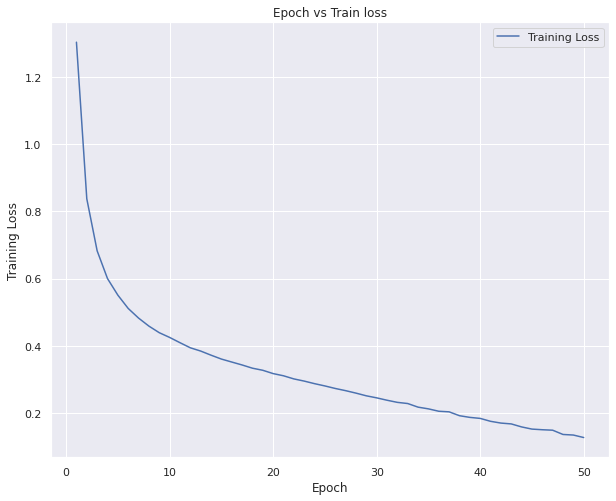

In [101]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df1)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

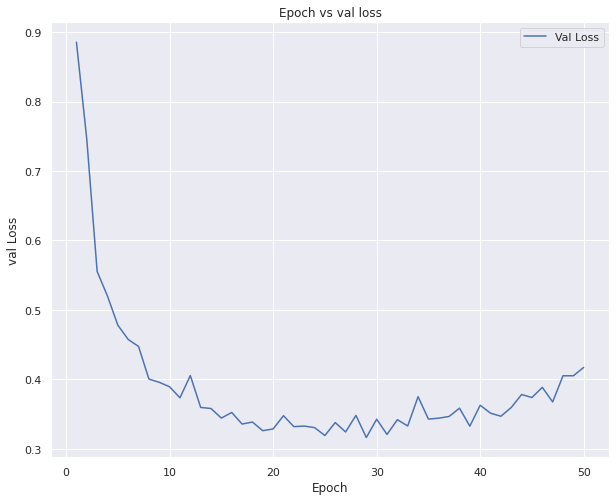

In [102]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df1)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

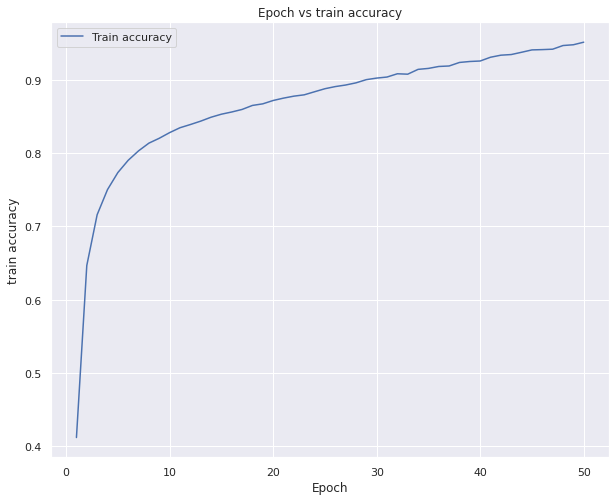

In [103]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df1)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

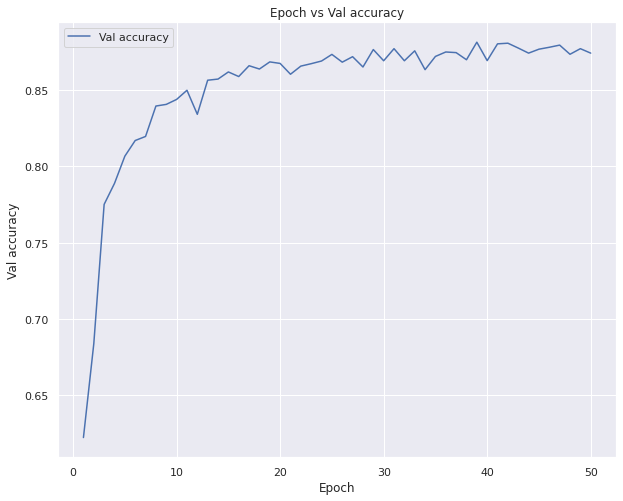

In [104]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df1)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

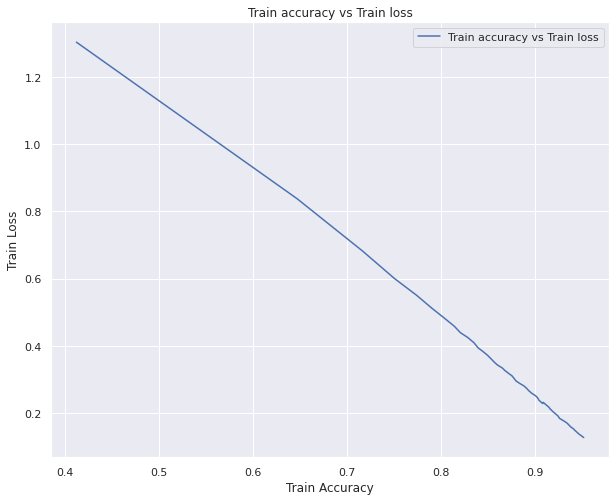

In [115]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df1)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

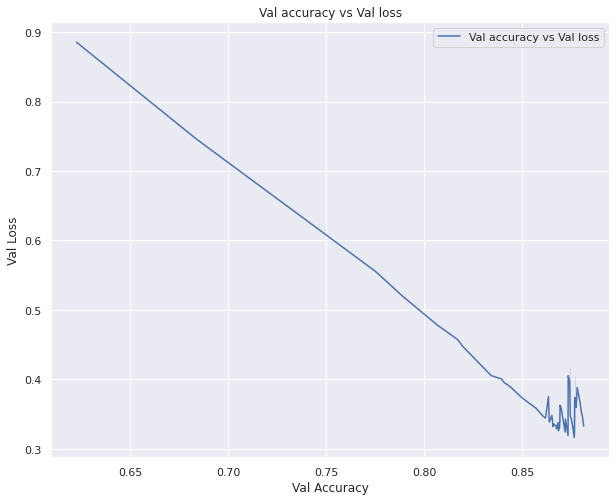

In [152]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df1)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [142]:
test_data

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# -- Reshaping the final test data--

In [160]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [161]:
df_x_test.shape

(10000, 28, 28, 1)

In [162]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# 1. --Resizing the data into 48*48--
# 2. --Normalizing the test data--

In [163]:
df_x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in df_x_test])



df_x_test=df_x_test.astype('float32')

#rescaling it between 0 to 1
df_x_test /=255

In [164]:
target_classes1 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 123us/step


In [165]:
target_classes1

array([[0.19950825, 0.20029794, 0.19785845, 0.20101832, 0.20131701],
       [0.20031403, 0.20021087, 0.19862933, 0.20108798, 0.19975784],
       [0.20012967, 0.19984159, 0.19956179, 0.20030066, 0.20016631],
       ...,
       [0.19995774, 0.20035791, 0.19810042, 0.20075057, 0.20083335],
       [0.20056696, 0.19985402, 0.1991407 , 0.2007332 , 0.19970517],
       [0.20060432, 0.20023662, 0.19864626, 0.20054795, 0.19996488]],
      dtype=float32)

In [166]:
target_classes1=np.argmax(target_classes1,axis=1)

In [167]:
target_classes1

array([4, 3, 3, ..., 4, 3, 0])

In [168]:
target_classes2 = model.predict_classes(df_x_test,verbose=1)
target_classes2

10000/10000 [==============================] - 1s 120us/step


array([4, 3, 3, ..., 4, 3, 0])

In [169]:
target_classes2=pd.DataFrame(target_classes2)

In [170]:
target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [171]:
target_classes2

,Id,Label
0,0,4
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
9995,9995,4
9996,9996,3
9997,9997,4
9998,9998,3


In [173]:
filename = 'submission_alexnet1.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_alexnet1.csv


# -----------MODEL 2----------- Adam() | BS: 64 | EPOCH: 50

In [174]:
model= Sequential()
model.add(Conv2D(96,(11,11), strides=1, activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(384, (3,3),padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256,  (3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Flatten())

model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 38, 38, 96)        11712     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 256)       614656    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 256)        

# Fitting the model

In [175]:
import timeit 
start=timeit.default_timer()
b=model.fit(x_train,y_train,batch_size = 64,epochs = 50,verbose=1,validation_data=(x_test,y_test),shuffle=False)
stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 416us/step - loss: 0.7844 - accuracy: 0.6590 - val_loss: 0.4784 - val_accuracy: 0.8115
Epoch 2/50
48000/48000 [==============================] - 19s 398us/step - loss: 0.4910 - accuracy: 0.8020 - val_loss: 0.3933 - val_accuracy: 0.8461
Epoch 3/50
48000/48000 [==============================] - 19s 399us/step - loss: 0.4359 - accuracy: 0.8231 - val_loss: 0.3828 - val_accuracy: 0.8456
Epoch 4/50
48000/48000 [==============================] - 19s 401us/step - loss: 0.4079 - accuracy: 0.8354 - val_loss: 0.3651 - val_accuracy: 0.8538
Epoch 5/50
48000/48000 [==============================] - 19s 402us/step - loss: 0.3854 - accuracy: 0.8432 - val_loss: 0.4297 - val_accuracy: 0.8263
Epoch 6/50
48000/48000 [==============================] - 19s 399us/step - loss: 0.3560 - accuracy: 0.8582 - val_loss: 0.3992 - val_accuracy: 0.8444
Epoch 7/50
48000/48000 [==============================] 

# RESULT: 
## Epoch 50/50 |val_loss: 0.4484 - val_accuracy: 0.8602 | Time taken 964.7407229679993

In [176]:
print('Time taken',stop-start)

Time taken 964.7407229679993


# PLOTS

In [177]:
b.history

{'val_loss': [0.4783717466990153,
  0.39331484031677244,
  0.38275703811645506,
  0.36505641229947405,
  0.42974872748057047,
  0.3991835559209188,
  0.3918698890209198,
  0.3870104380448659,
  0.4254235610167185,
  0.4541495281855265,
  0.4429999299844106,
  0.3821686060825984,
  0.34460887296994525,
  0.3878369499047597,
  0.3638199722369512,
  0.3779354435602824,
  0.36527497378985085,
  0.3786424770752589,
  0.4064738390445709,
  0.4051125071843465,
  0.391150048494339,
  0.436055557012558,
  0.41202994441986085,
  0.42007649461428326,
  0.5552022205988566,
  0.5062198045253754,
  0.44989136934280394,
  0.5164101394017537,
  0.5690225599606832,
  0.408031378587087,
  0.5106597352027893,
  0.4361600040594737,
  0.3946496117909749,
  0.41369936672846475,
  0.37817002379894255,
  0.4792861320575078,
  0.39006353545188904,
  0.4292858703931173,
  0.41210619986057284,
  0.41739476068814596,
  0.491785134712855,
  0.3828649374246597,
  0.41895352435112,
  0.4216506628195445,
  0.44707773

In [178]:
print(b.history['accuracy'])
print(b.history['loss'])
print(b.history['val_accuracy'])
print(b.history['val_loss'])

[0.6589792, 0.80202085, 0.823125, 0.8353958, 0.8431875, 0.85820836, 0.86095834, 0.866125, 0.8705417, 0.87495834, 0.8783542, 0.8776875, 0.88329166, 0.8871875, 0.8836875, 0.88927084, 0.88710415, 0.8909792, 0.89185417, 0.89520836, 0.8964792, 0.89816666, 0.8995625, 0.9045, 0.8971875, 0.90304166, 0.90033334, 0.91120833, 0.90935415, 0.908875, 0.90316665, 0.9091667, 0.9118958, 0.9085417, 0.91154164, 0.9150208, 0.91054165, 0.91175, 0.913375, 0.9172292, 0.92347914, 0.9106042, 0.91466665, 0.91845834, 0.92539585, 0.92233336, 0.9160417, 0.9186875, 0.9060417, 0.91941667]
[0.7843626523812612, 0.4910295981566111, 0.4358711164196332, 0.4079276127020518, 0.385431295355161, 0.35604484780629475, 0.342352259238561, 0.3297018092870712, 0.3224067907532056, 0.3102681235671043, 0.29936966371536256, 0.3007279815375805, 0.2922435966630777, 0.2796252218782902, 0.28717351652185125, 0.2734812373419603, 0.2772147516111533, 0.26818226420879365, 0.2694181987543901, 0.2618666548927625, 0.26014026352763175, 0.260484967

### Making dataframe

In [179]:
train_acc_1=b.history['accuracy']
train_loss_1=b.history['loss']
val_acc_1=b.history['val_accuracy']
val_loss_1=b.history['val_loss']

num=len(b.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [180]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [182]:
history_df2=pd.DataFrame(eplist,columns = ['Epoch'])
history_df2['train_acc']=pd.DataFrame(train_acc_1)

In [183]:
history_df2['train_loss']=pd.DataFrame(train_loss_1)
history_df2['val_acc']=pd.DataFrame(val_acc_1)
history_df2['val_loss']=pd.DataFrame(val_loss_1)

In [243]:
history_df2

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.658979,0.784363,0.811500,0.478372
1,2,0.802021,0.491030,0.846083,0.393315
2,3,0.823125,0.435871,0.845583,0.382757
3,4,0.835396,0.407928,0.853833,0.365056
4,5,0.843188,0.385431,0.826250,0.429749
5,6,0.858208,0.356045,0.844417,0.399184
6,7,0.860958,0.342352,0.845917,0.391870
7,8,0.866125,0.329702,0.857333,0.387010
8,9,0.870542,0.322407,0.829083,0.425424
9,10,0.874958,0.310268,0.816917,0.454150


### Epoch vs Train loss

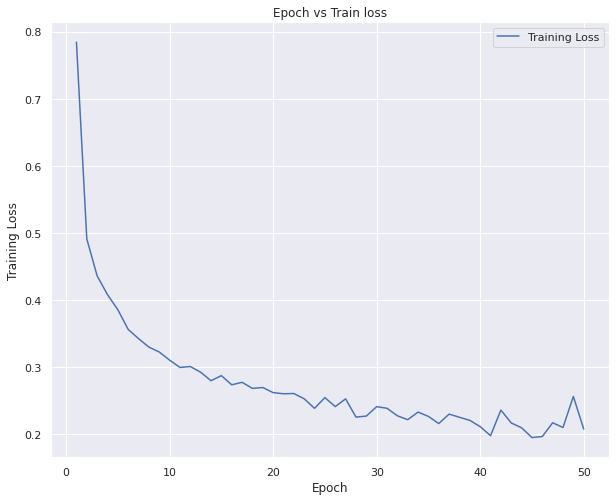

In [185]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df2)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

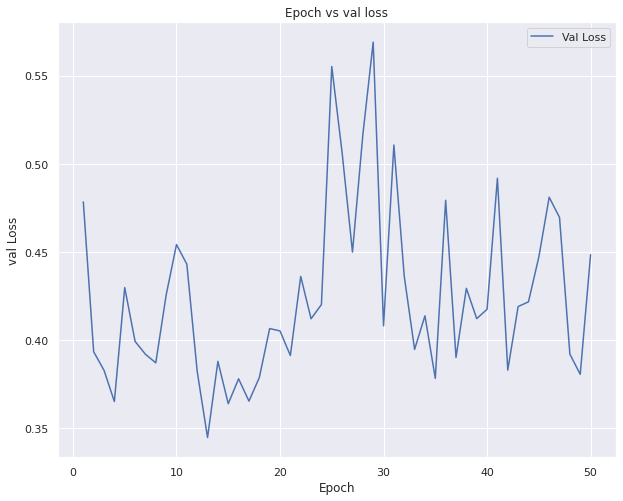

In [186]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df2)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

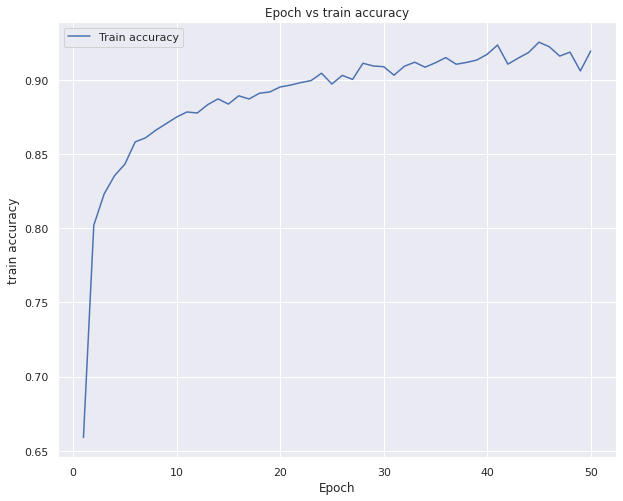

In [187]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df2)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

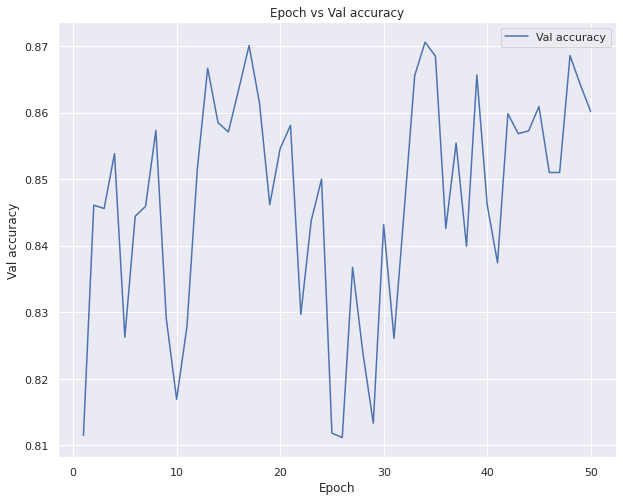

In [188]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df2)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

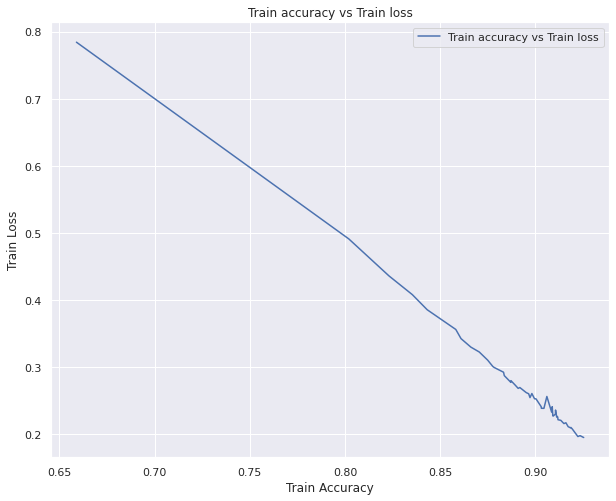

In [189]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df2)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

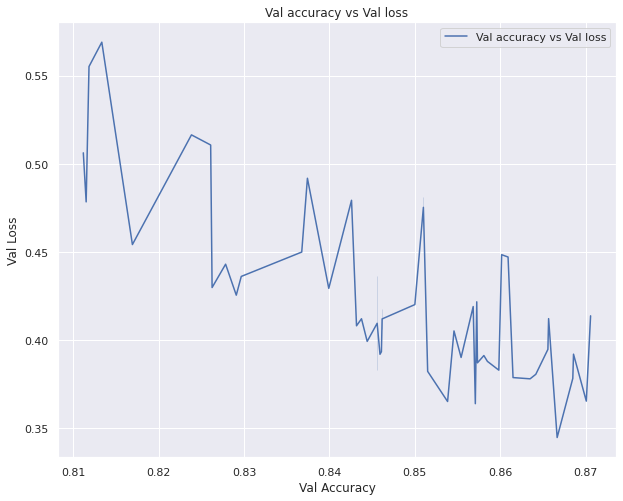

In [190]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df2)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [191]:
test_data

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# -- Reshaping the final test data--

In [192]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [193]:
df_x_test.shape

(10000, 28, 28, 1)

In [194]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# 1. --Resizing the data into 48*48--
# 2. --Normalizing the test data--

In [195]:
df_x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in df_x_test])



df_x_test=df_x_test.astype('float32')

#rescaling it between 0 to 1
df_x_test /=255

In [196]:
target_classes2 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 122us/step


In [197]:
target_classes2

array([[9.8906652e-09, 2.0795052e-05, 1.3862860e-02, 9.6678925e-01,
        1.9326977e-02],
       [2.9062175e-27, 1.1337906e-23, 1.4508151e-12, 2.1519669e-04,
        9.9978477e-01],
       [7.9354429e-01, 1.7321226e-01, 3.2723434e-02, 4.0476525e-04,
        1.1534322e-04],
       ...,
       [1.0071616e-15, 4.6739368e-09, 4.3638429e-04, 9.9937350e-01,
        1.9013959e-04],
       [4.7956069e-06, 2.6211599e-01, 7.3585474e-01, 2.0158791e-03,
        8.5151387e-06],
       [3.3276673e-10, 5.2722376e-06, 2.2856247e-01, 7.7134448e-01,
        8.7816756e-05]], dtype=float32)

In [199]:
target_classes2=np.argmax(target_classes2,axis=1)

In [200]:
target_classes2

array([3, 4, 0, ..., 3, 2, 3])

In [201]:
target_classes2=pd.DataFrame(target_classes2)

In [202]:
target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [203]:
target_classes2

,Id,Label
0,0,3
1,1,4
2,2,0
3,3,2
4,4,2
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [204]:
filename = 'submission_alexnet2.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_alexnet2.csv


# -----------MODEL 3----------- Adadelta() | BS: 64 | EPOCH: 50

In [214]:
model= Sequential()
model.add(Conv2D(96,(11,11), strides=1, activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(384, (3,3),padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256,  (3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Flatten())

model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer = keras.optimizers.Adadelta() , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 38, 38, 96)        11712     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 18, 18, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 8, 256)       

# Fitting the model

In [215]:
import timeit 
start=timeit.default_timer()
c=model.fit(x_train,y_train,batch_size = 64,epochs = 50,verbose=1,validation_data=(x_test,y_test),shuffle=False)
stop=timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 460us/step - loss: 1.1349 - accuracy: 0.4854 - val_loss: 0.6457 - val_accuracy: 0.7249
Epoch 2/50
48000/48000 [==============================] - 22s 456us/step - loss: 0.6319 - accuracy: 0.7338 - val_loss: 0.6434 - val_accuracy: 0.7112
Epoch 3/50
48000/48000 [==============================] - 22s 450us/step - loss: 0.5281 - accuracy: 0.7784 - val_loss: 0.4512 - val_accuracy: 0.8131
Epoch 4/50
48000/48000 [==============================] - 22s 452us/step - loss: 0.4680 - accuracy: 0.8062 - val_loss: 0.4284 - val_accuracy: 0.8236
Epoch 5/50
48000/48000 [==============================] - 22s 451us/step - loss: 0.4262 - accuracy: 0.8234 - val_loss: 0.4414 - val_accuracy: 0.8135
Epoch 6/50
48000/48000 [==============================] - 22s 449us/step - loss: 0.3944 - accuracy: 0.8376 - val_loss: 0.4420 - val_accuracy: 0.8152
Epoch 7/50
48000/48000 [==============================] 

# RESULT: 
## Epoch 50/50 |val_loss: 1.1783 - val_accuracy: 0.8524 | Time taken 1089.7482127199983

In [216]:
print('Time taken',stop-start)

Time taken 1089.7482127199983


# PLOTS

In [217]:
c.history

{'val_loss': [0.6457021930217743,
  0.6434014447530111,
  0.45124408197402954,
  0.4284165814717611,
  0.44140328280131025,
  0.44195018569628397,
  0.38911881963411965,
  0.45208913946151735,
  0.48209753759702045,
  0.5178076481819153,
  0.44890393670399986,
  0.4396044273376465,
  0.4671781717936198,
  0.48166974584261574,
  0.48191532913843793,
  0.4557379146416982,
  0.5247517090638478,
  0.6165105191866557,
  0.5918329533735911,
  0.6024614017009735,
  0.6863717884222666,
  0.6110526359875997,
  0.711440452337265,
  0.8356349656979243,
  0.7320333144664765,
  0.7027253068288167,
  0.7217053835391998,
  0.822100061416626,
  0.8013133460680644,
  0.7567293669382731,
  0.9414699019591014,
  0.9527563790480296,
  0.8926674324671428,
  0.8842315264542897,
  0.8462509230772655,
  0.8751680028438568,
  0.901971201658249,
  0.9212413914203644,
  0.9915906631151835,
  1.175298222064972,
  0.9070822374025981,
  1.0847311108112334,
  1.1453204723199208,
  0.9804263113339742,
  1.25099124836

In [218]:
print(c.history['accuracy'])
print(c.history['loss'])
print(c.history['val_accuracy'])
print(c.history['val_loss'])

[0.4854375, 0.7338125, 0.77835417, 0.8061875, 0.82339585, 0.8376458, 0.8503125, 0.8616667, 0.8710625, 0.8802292, 0.88872916, 0.89727086, 0.9021875, 0.9064583, 0.91464585, 0.91745836, 0.9236042, 0.92497915, 0.9323958, 0.93277085, 0.9372917, 0.942, 0.9415, 0.94810414, 0.9492292, 0.9503958, 0.954, 0.9549583, 0.9590833, 0.9567292, 0.96047914, 0.96216667, 0.9639583, 0.9648125, 0.9666042, 0.96725, 0.96675, 0.96879166, 0.9702917, 0.9713125, 0.9715833, 0.97289586, 0.9741875, 0.9730833, 0.9755833, 0.9755, 0.97658336, 0.97845834, 0.97641665, 0.9769792]
[1.1349080533186595, 0.6319376857678095, 0.5281314882040024, 0.4679691356619199, 0.4261985576550166, 0.39439564818143846, 0.36569349137942, 0.3375384049912294, 0.3162945658067862, 0.29304718975226085, 0.2763243006269137, 0.25442695968349777, 0.24156700226167838, 0.2288263215472301, 0.21442769334216913, 0.2065824392537276, 0.19551578365266323, 0.1880813023597002, 0.17664848257104557, 0.17315109708656867, 0.1590612815991044, 0.15349436654150486, 0.1

### Making dataframe

In [219]:
train_acc_1=c.history['accuracy']
train_loss_1=c.history['loss']
val_acc_1=c.history['val_accuracy']
val_loss_1=c.history['val_loss']

num=len(c.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [220]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [221]:
history_df3=pd.DataFrame(eplist,columns = ['Epoch'])
history_df3['train_acc']=pd.DataFrame(train_acc_1)

In [222]:
history_df3['train_loss']=pd.DataFrame(train_loss_1)
history_df3['val_acc']=pd.DataFrame(val_acc_1)
history_df3['val_loss']=pd.DataFrame(val_loss_1)

In [223]:
history_df3

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.485438,1.134908,0.724917,0.645702
1,2,0.733813,0.631938,0.711167,0.643401
2,3,0.778354,0.528131,0.813083,0.451244
3,4,0.806188,0.467969,0.823583,0.428417
4,5,0.823396,0.426199,0.813500,0.441403
5,6,0.837646,0.394396,0.815250,0.441950
6,7,0.850312,0.365693,0.845167,0.389119
7,8,0.861667,0.337538,0.821333,0.452089
8,9,0.871063,0.316295,0.834417,0.482098
9,10,0.880229,0.293047,0.815667,0.517808


### Epoch vs Train loss

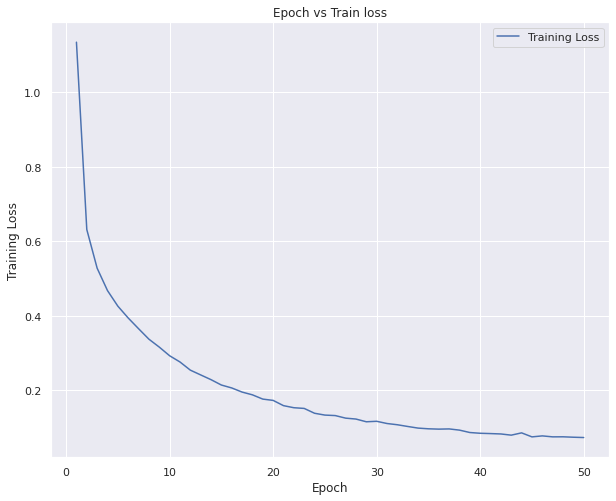

In [224]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df3)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

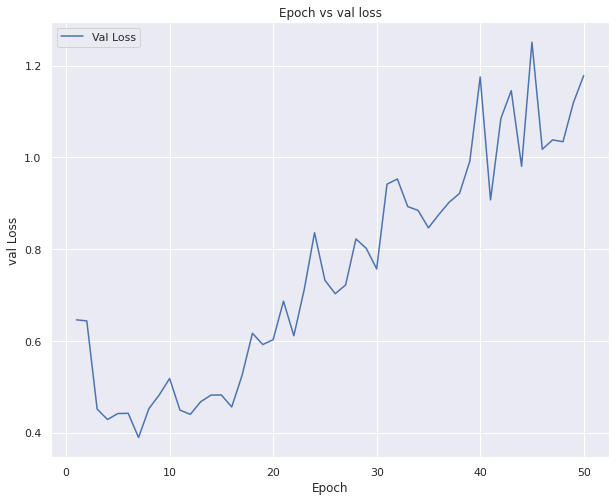

In [225]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df3)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

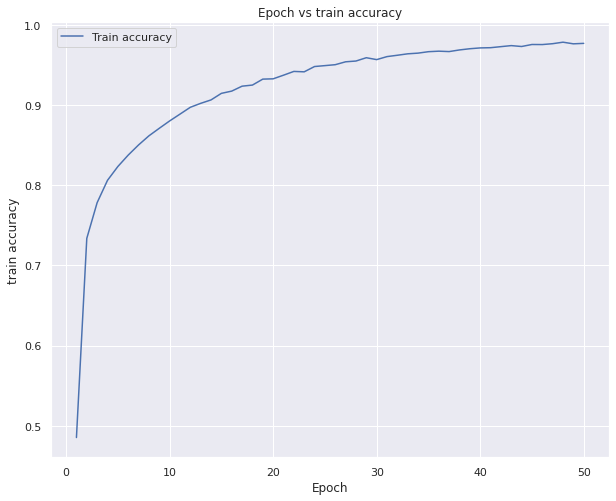

In [226]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df3)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

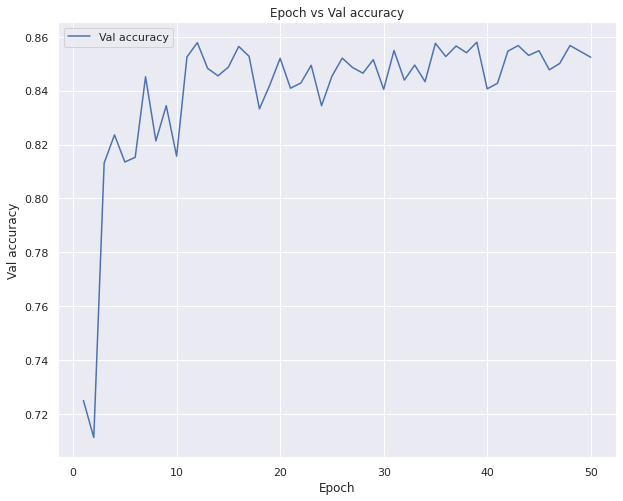

In [227]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df3)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

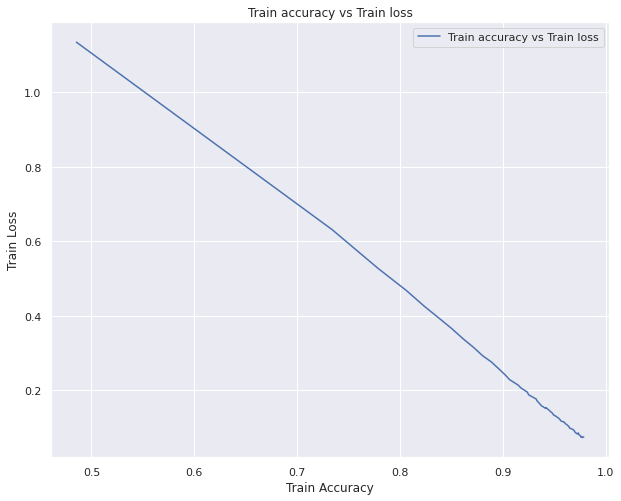

In [228]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df3)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

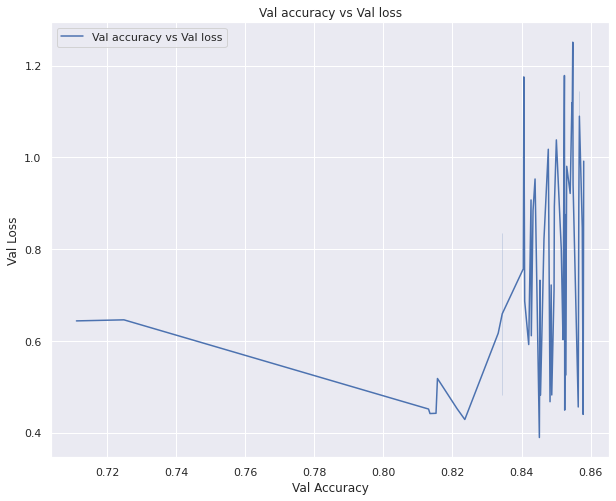

In [229]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df3)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [230]:
test_data

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# -- Reshaping the final test data--

In [231]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [232]:
df_x_test.shape

(10000, 28, 28, 1)

In [233]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# 1. --Resizing the data into 48*48--
# 2. --Normalizing the test data--

In [234]:
df_x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in df_x_test])



df_x_test=df_x_test.astype('float32')

#rescaling it between 0 to 1
df_x_test /=255

In [235]:
target_classes3 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 1s 132us/step


In [236]:
target_classes3

array([[4.92998983e-18, 1.78765021e-18, 5.69985834e-16, 1.36376051e-02,
        9.86362398e-01],
       [4.46196725e-12, 7.18640642e-14, 3.00202192e-13, 7.72330532e-06,
        9.99992251e-01],
       [8.40508878e-01, 1.58636391e-01, 1.05069215e-04, 1.62100710e-04,
        5.87635208e-04],
       ...,
       [2.06448886e-15, 1.23766845e-14, 1.41922729e-09, 1.58350304e-01,
        8.41649711e-01],
       [6.85386210e-12, 9.88206804e-01, 1.17932372e-02, 1.21703246e-11,
        6.64005115e-16],
       [8.44752140e-05, 1.85171899e-04, 8.11690271e-01, 1.86588347e-01,
        1.45173864e-03]], dtype=float32)

In [237]:
target_classes3=np.argmax(target_classes3,axis=1)

In [238]:
target_classes3

array([4, 4, 0, ..., 4, 1, 2])

In [239]:
target_classes3=pd.DataFrame(target_classes3)

In [240]:
target_classes3=pd.DataFrame.reset_index(target_classes3)
target_classes3.columns=['Id','Label']

In [241]:
target_classes3

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,3
...,...,...
9995,9995,3
9996,9996,1
9997,9997,4
9998,9998,1


In [242]:
filename = 'submission_alexnet3.csv'
target_classes3.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_alexnet3.csv
